# 1. $\chi^{2}$ contingency table analysis

Chi Square is a widely used tool to check association and is explained here with very simple examples so that the concept is understood. Chi Square is used to check the effect of a factor on output and is also used to check goodness of fit of various distributions.

Important to note : Chi Square is used when both X and Y are discrete data types. Chi Square statistic should be estimated only on counts of data. If the data is in percentage form, they should be converted to counts or numbers. Another assumption is that the observations are drawn independently [(taken from SixSigmaStats.com)](https://sixsigmastats.com/chi-square-explained-with-examples/)


In [1]:
# My first chi-square 
# Make as many anotations as necessary
rm(list=ls())

# load the libraries
library(ggplot2)
library(dplyr)

# Get the data

# in R studio
# lady <- read.csv("file path/datasets-master/ladybirds_morph_colour.csv")

lady <- read.csv("datasets-master/ladybirds_morph_colour.csv")
glimpse(lady)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 20
Columns: 4
$ Habitat      <chr> "Rural", "Rural", "Rural", "Rural", "Rural", "Rural", "Ru…
$ Site         <chr> "R1", "R2", "R3", "R4", "R5", "R1", "R2", "R3", "R4", "R5…
$ morph_colour <chr> "black", "black", "black", "black", "black", "red", "red"…
$ number       <int> 10, 3, 4, 7, 6, 15, 18, 9, 12, 16, 32, 25, 25, 17, 16, 17…


## The ladybirds (Adalia bipunctata) data set
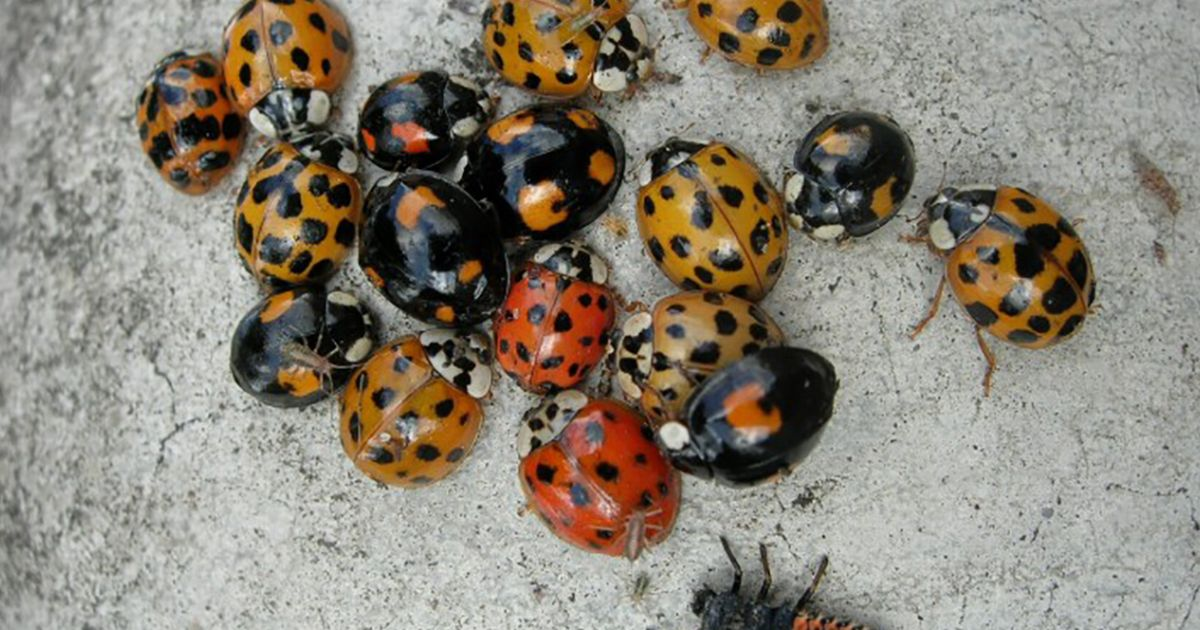

In [3]:
totals <- lady %>%
    group_by(Habitat, morph_colour) %>%
        summarise(total.number = sum(number))
totals

`summarise()` regrouping output by 'Habitat' (override with `.groups` argument)



Habitat,morph_colour,total.number
<chr>,<chr>,<int>
Industrial,black,115
Industrial,red,85
Rural,black,30
Rural,red,70


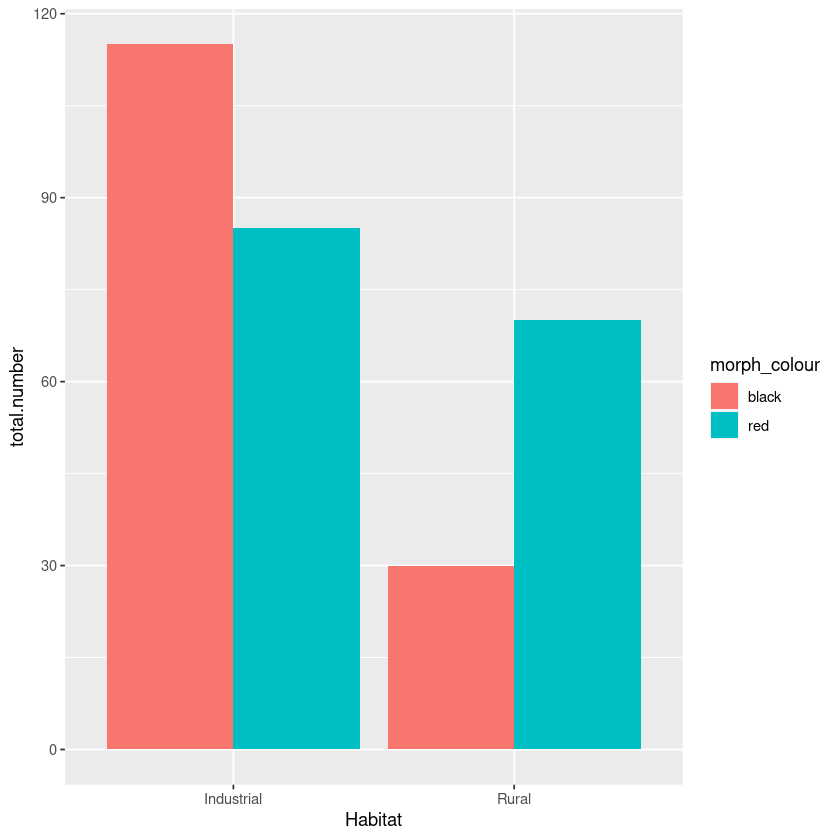

In [5]:
# plot the data

ggplot(totals, aes(x = Habitat, y =total.number, fill = morph_colour )) +
geom_bar(stat="identity", position = 'dodge')

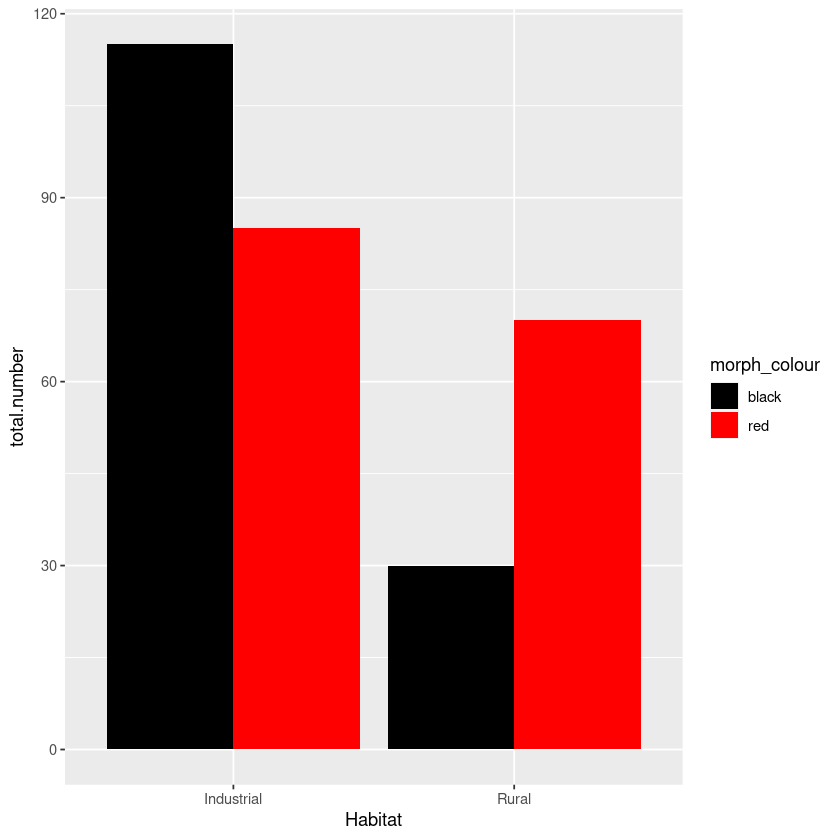

In [6]:
# plot the data

ggplot(totals, aes(x = Habitat, y =total.number, fill = morph_colour )) +
geom_bar(stat="identity", position = 'dodge') + 
scale_fill_manual(values = c(black ="black", red = "red"))

In [9]:
lady.mat <- xtabs(number~ Habitat + morph_colour, data = lady)
lady.mat

            morph_colour
Habitat      black red
  Industrial   115  85
  Rural         30  70

In [10]:
chisq.test(lady.mat)


	Pearson's Chi-squared test with Yates' continuity correction

data:  lady.mat
X-squared = 19.103, df = 1, p-value = 1.239e-05


In [12]:
test <- chisq.test(lady.mat)
names(test)

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"

In [13]:
test$expected

,black,red
Industrial,96.66667,103.33333
Rural,48.33333,51.66667
